In [1]:
# Importing libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

In [2]:
# Load data into dataframe

url = 'data lac.xlsx'

df_lac = pd.read_excel(url)
df_lac.head()

,FechaProgramacion,Fabrica,Seccion,Linea,Equipo,TiempoPNP
0,2018-07-19,Envases,Envasado Evaporada,Linea Baby 4,TRANSP CABLE ELEVADO ENFRIADOR,45.0
1,2018-07-19,Envases,Envasado Evaporada,Linea Baby 4,TRANSP CABLE ELEVADO CERRADORA,45.0
2,2018-07-19,Envases,Envasado Evaporada,Linea Baby 4,TABLERO AUTOMATISMO ESTERILIZADOR,45.0
3,2018-07-19,Envases,Envasado Evaporada,Linea Baby 4,ROBOT PALETIZADOR KUKA,45.0
4,2018-07-19,Envases,Envasado Evaporada,Linea Baby 4,ETIQUETADORA,45.0


### Pregunta Nº 1: 

> **_Realizar un análisis exploratorio de datos (Selección de filas, columnas, agrupación de variables con funciones de agregación)_**

In [3]:
# Mostrando las medidas de tendecia central de la variable cuantitativa (numérica)

df_lac.describe()

# Cantidad de Registros: 9999
# Media de los datos: 85.94
# Desviación estandar: 67.77
# Valor mínimo: 5
# Valor del primer quartil: 40
# Valor de la mediana (segundo quartil): 67
# Valor del tercer quartil: 113
# Valor máximo: 360

,TiempoPNP
count,9999.000000
mean,85.944594
std,67.778384
min,5.000000
25%,40.000000
50%,67.000000
75%,113.000000
max,360.000000


In [4]:
# Obteniendo los valores únicos de la columna Linea
np.unique(df_lac.Linea)

array(['Linea Baby 1', 'Linea Baby 2', 'Linea Baby 3', 'Linea Baby 4',
       'Linea Baby 6', 'Linea Baby 7'], dtype=object)

In [5]:
# Desviación estándar para el feature FechaProgramación
np.std(df_lac.FechaProgramacion, ddof = 1)

Timedelta('185 days 21:55:27.827587962')

In [6]:
# Desviación estándar para el feature TiempoPNP
np.std(df_lac.TiempoPNP, ddof = 1)

67.77838381368686

### Pregunta Nº 2: 

> **_Realizar boxplots e histogramas de la variable numérica (comparar) medidas de tendencia central y estadísticos de posición. (TiempoPNP)_**

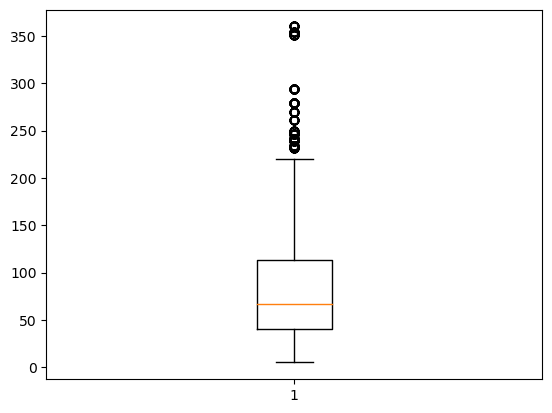

In [7]:
plt.boxplot(df_lac.TiempoPNP)
plt.show()

# La mediana del feature TiempoPNP es 67. Esto se puede visualizar en el boxplot a continuación.

1. Valor mínimo: 5 
1. Valor del primer quartil: 40
1. Valor de la mediana (segundo quartil): 67
1. Valor del tercer quartil: 113
1. Valor máximo: 360

Los valores indicados arriba, se pueden visualizar facilmente en el boxplot.

In [8]:
# Calculando la moda de TiempoPNP
mode(df_lac.TiempoPNP)

ModeResult(mode=array([20.]), count=array([315]))

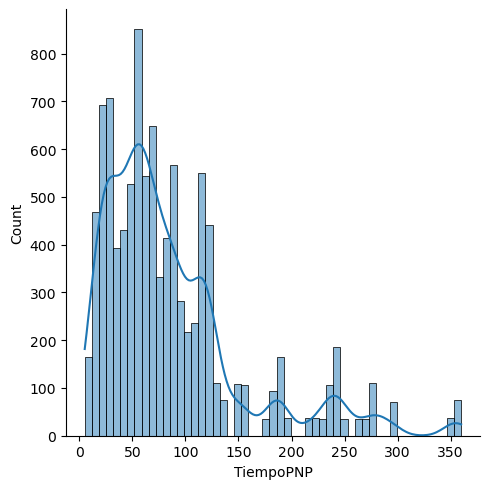

In [9]:
# Histograma del feature TiempoPNP 
sns.displot(x = df_lac.TiempoPNP, kde = True, kde_kws = {'cumulative': True});
plt.show()

/Users/dev-kazum/developer/venv-python/tasks/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


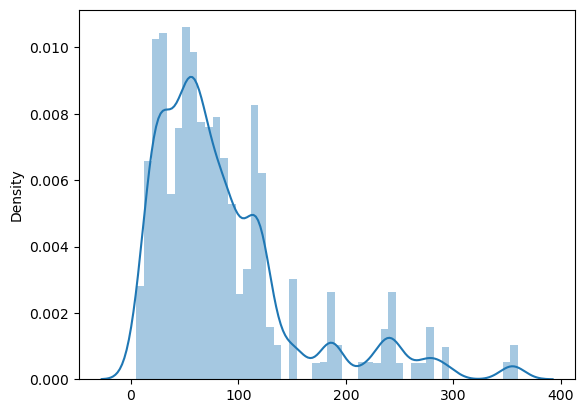

In [10]:
# Histograma del feature TiempoPNP Normalizada
sns.distplot(x = df_lac.TiempoPNP, kde = True,);
plt.show()

/Users/dev-kazum/developer/venv-python/tasks/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


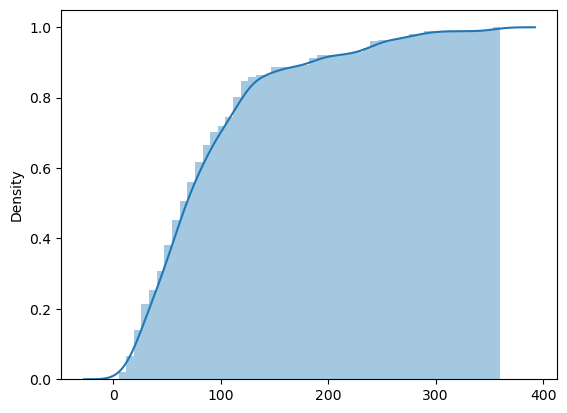

In [11]:
# Histograma del feature TiempoPNP (Acumulado)
sns.distplot(x = df_lac.TiempoPNP, kde = True, hist_kws = {'cumulative': True}, kde_kws = {'cumulative': True});
plt.show()

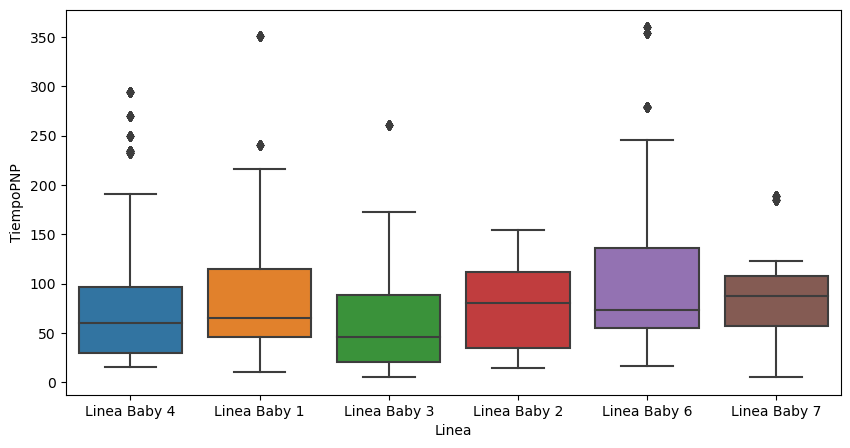

In [12]:
# Boxplot Linea / TiempoPNP

plt.figure(figsize=(10,5))
fig = sns.boxplot(x="Linea", y="TiempoPNP", data=df_lac)
plt.show()

Analisis del feature cuantitativo (TiempoPNP) con una de las variables categóricas (Linea)

### Pregunta Nº 3: 
> **_Hacer un modelo weibull con el tiempo PNP indicar los parámetros de forma (shape) y escala del modelo_**

In [13]:
%load_ext rpy2.ipython

In [14]:
%%R

install.packages('rriskDistributions')
install.packages('MASS')
install.packages('dplyr')

library(rriskDistributions)
library(MASS)
library(dplyr)

--- Please select a CRAN mirror for use in this session ---
Secure CRAN mirrors 

 1: 0-Cloud [https]
 2: Australia (Canberra) [https]
 3: Australia (Melbourne 1) [https]
 4: Australia (Melbourne 2) [https]
 5: Australia (Perth) [https]
 6: Austria [https]
 7: Belgium (Brussels) [https]
 8: Brazil (BA) [https]
 9: Brazil (PR) [https]
10: Brazil (RJ) [https]
11: Brazil (SP 1) [https]
12: Brazil (SP 2) [https]
13: Bulgaria [https]
14: Canada (MB) [https]
15: Canada (ON 2) [https]
16: Canada (ON 3) [https]
17: Chile (Santiago) [https]
18: China (Beijing 2) [https]
19: China (Hefei) [https]
20: China (Hong Kong) [https]
21: China (Guangzhou) [https]
22: China (Lanzhou) [https]
23: China (Nanjing) [https]
24: China (Shanghai 1) [https]
25: China (Shanghai 2) [https]
26: China (Shenzhen) [https]
27: Costa Rica [https]
28: Cyprus [https]
29: Czech Republic [https]
30: Denmark [https]
31: East Asia [https]
32: Ecuador (Cuenca) [https]
33: Ecuador (Quito) [https]
34: Estonia [https]
35: France 

R[write to console]: Warning:
R[write to console]:  unable to access index for repository https://nbcgib.uesc.br/mirrors/cran/src/contrib:
  cannot open URL 'https://nbcgib.uesc.br/mirrors/cran/src/contrib/PACKAGES'

R[write to console]: Warning:
R[write to console]:  unable to access index for repository https://nbcgib.uesc.br/mirrors/cran/bin/macosx/contrib/4.1:
  cannot open URL 'https://nbcgib.uesc.br/mirrors/cran/bin/macosx/contrib/4.1/PACKAGES'

R[write to console]: Warning:
R[write to console]:  unable to access index for repository https://nbcgib.uesc.br/mirrors/cran/src/contrib:
  cannot open URL 'https://nbcgib.uesc.br/mirrors/cran/src/contrib/PACKAGES'

R[write to console]: Warning:
R[write to console]:  unable to access index for repository https://nbcgib.uesc.br/mirrors/cran/bin/macosx/contrib/4.1:
  cannot open URL 'https://nbcgib.uesc.br/mirrors/cran/bin/macosx/contrib/4.1/PACKAGES'

R[write to console]: Warning:
R[write to console]:  unable to access index for repositor

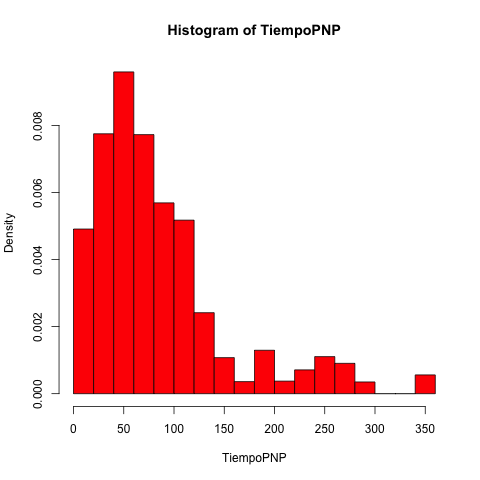

In [15]:
%%R


data = read.csv(file = 'data lac.csv', sep = ',') # cambiar por tu ruta local
head(data) 

data = data %>%
  select(TiempoPNP) 

TiempoPNP = data$TiempoPNP

hist(TiempoPNP, col = 'red', freq = 0)

In [16]:
%%R

# Calculando los valores de escala y de forma
fitdistr(TiempoPNP, densfun = 'weibull')


      shape         scale   
   1.37752840   94.63353969 
 ( 0.01021116) ( 0.72733571)


#### Se intentó revalidar los valores arrojados, pero no se pudo debido a un error con una libreria.

fit.cont(TiempoPNP)

#### Tengo problemas con una libreria X11 para plotear externamente.

> RInterpreterError: Failed to parse and evaluate line '\nfit.cont(TiempoPNP)\n. R error message: "Error: .onLoad failed in loadNamespace() for 'tcltk', details:\n  call: fun(libname, pkgname)\n  error: X11 library is missing: install XQuartz from www.xquartz.org"

In [17]:
%%R

pweibull(100, 1.37752, 94.6335) - pweibull(20, 1.37752, 94.6335) 

[1] 0.5491581


Validamos que existe un 54.9% de probabilidades de encontrar valores entre 20 y 100

In [18]:
%%R

1 - pweibull(100, 1.37752, 94.6335) 

[1] 0.3399546


Validamos que existe un 33.9% de probabilidades de encontrar valores mayores a 100

In [19]:
%%R

pweibull(20, 1.37752, 94.6335) 

[1] 0.1108873


Validamos que existe un 11% de probabilidades de encontrar valores menores a 20